# Robust vs Fragile Solutions: Optimal Doesn't Always Mean Best

This notebook demonstrates the critical difference between optimal solutions (best under perfect conditions) and robust solutions (work well across many scenarios).

Understanding this is critical because:
- **Optimal solutions** are mathematically best under fixed assumptions
- **Robust solutions** work well even when conditions vary
- Optimal but fragile solutions often fail in practice
- Robust solutions may be slightly less optimal but much more reliable


## Key Concepts

**Fragile Solutions**:
- Optimal under perfect conditions
- Break when inputs vary
- High variability in outcomes
- High risk of failure

**Robust Solutions**:
- Slightly less optimal on average
- Work well across many scenarios
- Lower variability in outcomes
- Lower risk of failure

**Critical insight**: In an uncertain world, a robust solution that works 95% of the time is usually better than an optimal solution that works 70% of the time.


## Scenario: Production Planning

You have two production plans:
- **Plan A (Optimal)**: Maximizes output under perfect conditions
- **Plan B (Robust)**: Slightly lower output but handles variability better

Which should you choose?


## Step 1: Install Required Packages (Colab)


In [1]:
# Install required packages (if needed in Colab)
%pip install numpy matplotlib pandas -q



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


## Step 2: Import Libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)


## Step 3: Define Two Production Plans


In [3]:
# Plan A: Optimal (fragile) - maximizes output when conditions are perfect
def plan_a_profit(demand, capacity):
    """Optimal plan: produces at full capacity"""
    production = min(capacity, demand)
    profit = production * 50  # $50 per unit
    # Penalty if demand > capacity (missed opportunity)
    if demand > capacity:
        profit -= (demand - capacity) * 30  # $30 penalty per missed unit
    return profit

# Plan B: Robust - slightly conservative but handles variability
def plan_b_profit(demand, capacity):
    """Robust plan: produces 90% of capacity to handle variability"""
    conservative_capacity = capacity * 0.9
    production = min(conservative_capacity, demand)
    profit = production * 50
    # Less penalty because we're not pushing to the limit
    if demand > conservative_capacity:
        profit -= (demand - conservative_capacity) * 20  # Lower penalty
    return profit

print("Two Production Plans:")
print("  Plan A (Optimal): Produces at full capacity")
print("  Plan B (Robust): Produces at 90% capacity")
print("\nLet's test both under uncertainty...")


Two Production Plans:
  Plan A (Optimal): Produces at full capacity
  Plan B (Robust): Produces at 90% capacity

Let's test both under uncertainty...


## Step 4: Test Both Plans Under Uncertainty


In [4]:
# Simulate both plans under uncertainty
num_scenarios = 1000
capacity = 1000

# Demand varies
demand_scenarios = np.random.normal(loc=1000, scale=150, size=num_scenarios)
demand_scenarios = np.clip(demand_scenarios, 700, 1300)

# Test both plans
plan_a_profits = [plan_a_profit(d, capacity) for d in demand_scenarios]
plan_b_profits = [plan_b_profit(d, capacity) for d in demand_scenarios]
plan_a_profits = np.array(plan_a_profits)
plan_b_profits = np.array(plan_b_profits)

print("SIMULATION RESULTS:")
print("=" * 60)
print(f"\nPlan A (Optimal/Fragile):")
print(f"  Average profit: ${plan_a_profits.mean():,.2f}")
print(f"  Range: ${plan_a_profits.min():,.2f} to ${plan_a_profits.max():,.2f}")
print(f"  Std Dev: ${plan_a_profits.std():,.2f}")
print(f"  Worst case: ${plan_a_profits.min():,.2f}")

print(f"\nPlan B (Robust):")
print(f"  Average profit: ${plan_b_profits.mean():,.2f}")
print(f"  Range: ${plan_b_profits.min():,.2f} to ${plan_b_profits.max():,.2f}")
print(f"  Std Dev: ${plan_b_profits.std():,.2f}")
print(f"  Worst case: ${plan_b_profits.min():,.2f}")

# Calculate reliability
plan_a_failures = (plan_a_profits < 30000).sum()  # Profit below threshold
plan_b_failures = (plan_b_profits < 30000).sum()
plan_a_reliability = (1 - plan_a_failures/num_scenarios) * 100
plan_b_reliability = (1 - plan_b_failures/num_scenarios) * 100

print(f"\n📊 RELIABILITY (profit > $30,000):")
print(f"  Plan A: {plan_a_reliability:.1f}% reliable")
print(f"  Plan B: {plan_b_reliability:.1f}% reliable")


SIMULATION RESULTS:

Plan A (Optimal/Fragile):
  Average profit: $45,434.71
  Range: $35,000.00 to $49,976.99
  Std Dev: $3,530.52
  Worst case: $35,000.00

Plan B (Robust):
  Average profit: $41,591.68
  Range: $35,000.00 to $44,987.87
  Std Dev: $2,370.14
  Worst case: $35,000.00

📊 RELIABILITY (profit > $30,000):
  Plan A: 100.0% reliable
  Plan B: 100.0% reliable


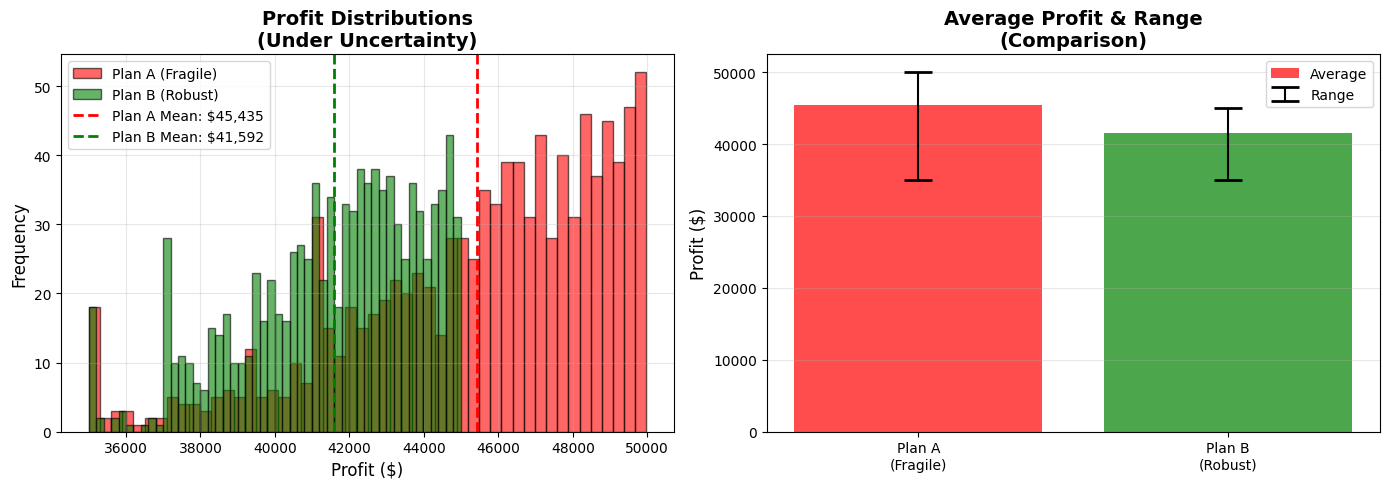


🔍 KEY INSIGHT:
   Plan A has higher average ($45,435) but wider range
   Plan B has lower average ($41,592) but narrower range
   Plan B is more RELIABLE (100.0% vs 100.0%)


In [5]:
# Create comparison visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Left: Distribution comparison
ax1.hist(plan_a_profits, bins=50, alpha=0.6, label='Plan A (Fragile)', color='red', edgecolor='black')
ax1.hist(plan_b_profits, bins=50, alpha=0.6, label='Plan B (Robust)', color='green', edgecolor='black')
ax1.axvline(plan_a_profits.mean(), color='red', linestyle='--', linewidth=2, label=f'Plan A Mean: ${plan_a_profits.mean():,.0f}')
ax1.axvline(plan_b_profits.mean(), color='green', linestyle='--', linewidth=2, label=f'Plan B Mean: ${plan_b_profits.mean():,.0f}')
ax1.set_xlabel('Profit ($)', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.set_title('Profit Distributions\n(Under Uncertainty)', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Right: Range comparison
plans = ['Plan A\n(Fragile)', 'Plan B\n(Robust)']
means = [plan_a_profits.mean(), plan_b_profits.mean()]
mins = [plan_a_profits.min(), plan_b_profits.min()]
maxs = [plan_a_profits.max(), plan_b_profits.max()]

x_pos = np.arange(len(plans))
ax2.bar(x_pos, means, alpha=0.7, color=['red', 'green'], label='Average')
# Convert to numpy arrays for subtraction
means_arr = np.array(means)
mins_arr = np.array(mins)
maxs_arr = np.array(maxs)
ax2.errorbar(x_pos, means, yerr=[means_arr - mins_arr, maxs_arr - means_arr], 
             fmt='none', color='black', capsize=10, capthick=2, label='Range')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(plans)
ax2.set_ylabel('Profit ($)', fontsize=12)
ax2.set_title('Average Profit & Range\n(Comparison)', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🔍 KEY INSIGHT:")
print(f"   Plan A has higher average (${plan_a_profits.mean():,.0f}) but wider range")
print(f"   Plan B has lower average (${plan_b_profits.mean():,.0f}) but narrower range")
print(f"   Plan B is more RELIABLE ({plan_b_reliability:.1f}% vs {plan_a_reliability:.1f}%)")


## Key Takeaways

1. **Optimal ≠ Best**: A solution that's optimal under perfect conditions may not be best in practice.

2. **Robustness matters**: Solutions that work well across many scenarios are often better than optimal but fragile ones.

3. **Trade-off exists**: You may sacrifice a bit of optimality for much better reliability.

4. **Simulation reveals this**: Without simulation, you can't see which solutions are fragile.

5. **Choose based on risk tolerance**: Risk-averse organizations should prefer robust solutions.

**Next steps**: In the next notebook, we'll learn about visualizing plans vs histories.
